In [22]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os as os
import matplotlib.pyplot as plt

# own code base
import sys
sys.path.append("..")
import tf_loss_functions as lf
import splines as sp

In [23]:
basis_dimension = 20
degree_bsplines = 3
penalty_diff_order = 2

x1 = np.array(pd.read_csv("./data/df_x1.csv", index_col=0).iloc[:,0])
x2 = np.array(pd.read_csv("./data/df_x2.csv", index_col=0).iloc[:,0])

f_x1 = np.array(pd.read_csv("./data/df_f_x1_wiggly.csv", index_col=0).iloc[:,0])
g_x2 = np.array(pd.read_csv("./data/df_g_x2_wiggly.csv", index_col=0).iloc[:,0])

labels = np.array(pd.read_csv("./data/df_y_wiggly.csv", index_col=0).iloc[:,0])
labels_expanded = np.expand_dims(labels, 1)

# create splines from class
x1_ps = sp.pspline(x=x1, degree_bsplines=degree_bsplines, penalty_diff_order=penalty_diff_order, knot_type="equi", basis_dimension=basis_dimension)
x2_ps = sp.pspline(x=x2, degree_bsplines=degree_bsplines, penalty_diff_order=penalty_diff_order, knot_type="equi", basis_dimension=basis_dimension)

In [24]:
def f(x):
    y = -3*x**3 + 2*x**2 + 5*x
    return y

def g(x):
    y = x**5 + 5*x**2
    return y


In [25]:
plotdata_tf = np.load("./results/final_spline_method=gcv_2d_epoch=5000_wiggly.npz")

lambda_param_x1_est = plotdata_tf["reg_param_x1"]
lambda_param_x2_est = plotdata_tf["reg_param_x2"]
weights_x1_est = plotdata_tf["weights_x1"]
weights_x2_est = plotdata_tf["weights_x2"]

In [26]:
results_gcv = pd.read_csv("./results/smoothing_param_method=gcv_2d_epochs=5000_wiggly.csv", index_col=0).iloc[:-1]
epochs = results_gcv.loc[:,"Epoch"]
lambda_param_x1_est_values = results_gcv.loc[:,"Lambda Parameter x1"]
lambda_param_x2_est_values = results_gcv.loc[:,"Lambda Parameter x2"]
gcv_values = results_gcv.loc[:,"GCV"]

lambda_param_x1_opt = np.array(lambda_param_x1_est_values.iloc[-1])
lambda_param_x2_opt = np.array(lambda_param_x2_est_values.iloc[-1])

In [27]:
print("Optimal lambda x1: ", lambda_param_x1_opt)
print("Optimal lambda x2: ", lambda_param_x2_opt)

Optimal lambda x1:  3.976666212081909
Optimal lambda x2:  0.5206520557403564


## - Results Plots

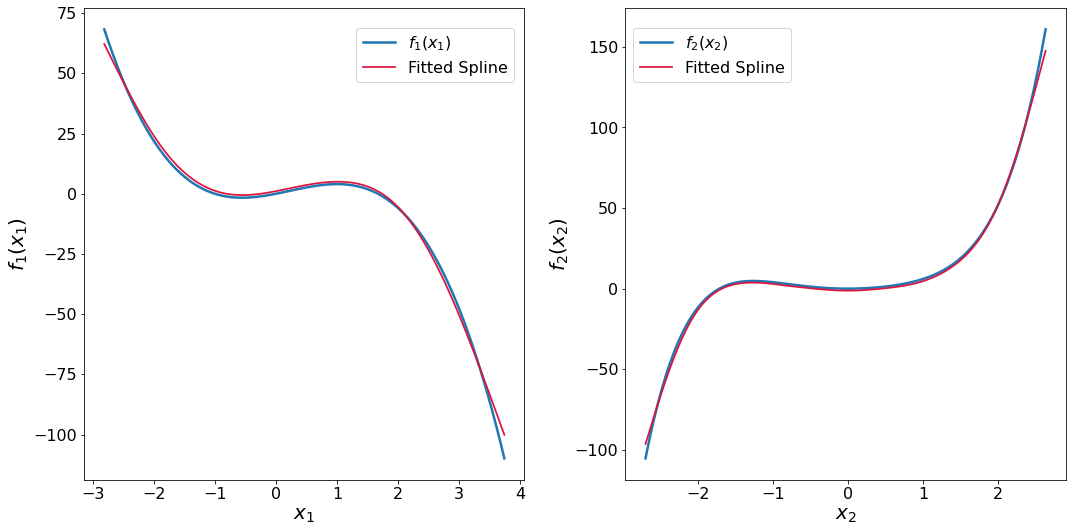

In [28]:
font_size = 20
font_size_legend = 16
font_size_ticks = 16
font_size_small = 18

x1_plot = np.linspace(x1.min(),x1.max(),num=100)
x2_plot = np.linspace(x2.min(),x2.max(),num=100)

fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))

axs[0].plot(x1_plot, f(x1_plot), lw=2.5, label=r'$f_1(x_1)$')

matrix_plot = sp.build_base(x1_plot, degree = degree_bsplines, knot_type = "given", given_knots = x1_ps.knots)[0]
y_hat = np.dot(matrix_plot, weights_x1_est)
axs[0].plot(x1_plot, y_hat, lw=1.75, label=f"Fitted Spline", color="crimson")

axs[0].set_xlabel(r"$x_1$", fontsize=font_size)
axs[0].set_ylabel(r'$f_1(x_1)$', fontsize=font_size)
axs[0].tick_params(labelsize=font_size_ticks)
axs[0].legend(loc='center left', bbox_to_anchor=(0.6, 0.9), fontsize=font_size_legend)


axs[1].plot(x2_plot, g(x2_plot), lw=2.5, label=r'$f_2(x_2)$')

matrix_plot = sp.build_base(x2_plot, degree = degree_bsplines, knot_type = "given", given_knots = x2_ps.knots)[0]
y_hat = np.dot(matrix_plot, weights_x2_est)
axs[1].plot(x2_plot, y_hat, lw=1.75, label=f"Fitted Spline", color="crimson")

axs[1].set_xlabel(r"$x_2$", fontsize=font_size)
axs[1].set_ylabel(r'$f_2(x_2)$', fontsize=font_size)
axs[1].tick_params(labelsize=font_size_ticks)
axs[1].legend(loc='center left', bbox_to_anchor=(0, 0.9), fontsize=font_size_legend)

fig.set_facecolor('white')
fig.tight_layout()
plt.savefig(f"./multidim_wiggly_2poly_example.png", bbox_inches='tight', dpi=300)
plt.savefig(f"./multidim_wiggly_2poly_example.pdf", bbox_inches='tight', dpi=300)
plt.show()